In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**Get the numerical variables from our dataset.**

In [4]:
numerical = data.select_dtypes(np.number)

In [5]:
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
numerical['Number of Policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

**Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.**

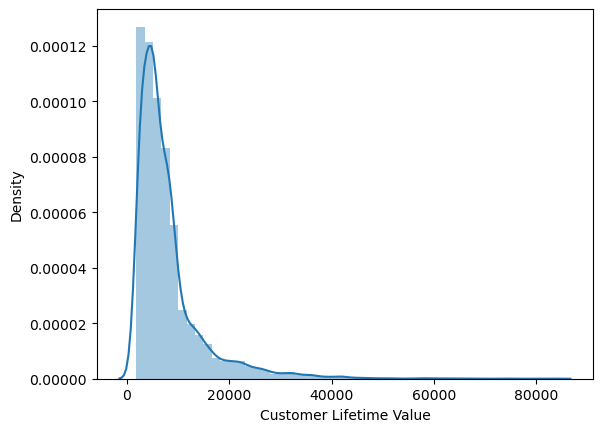

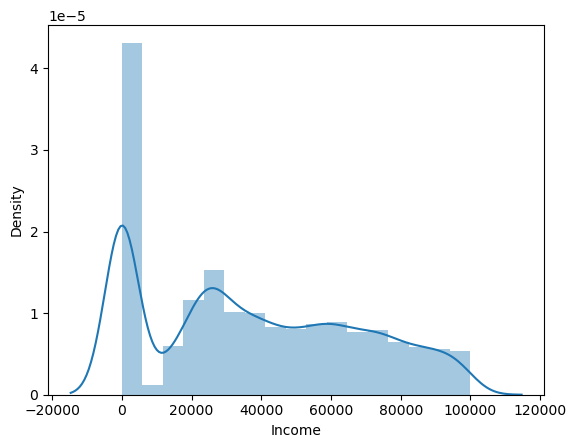

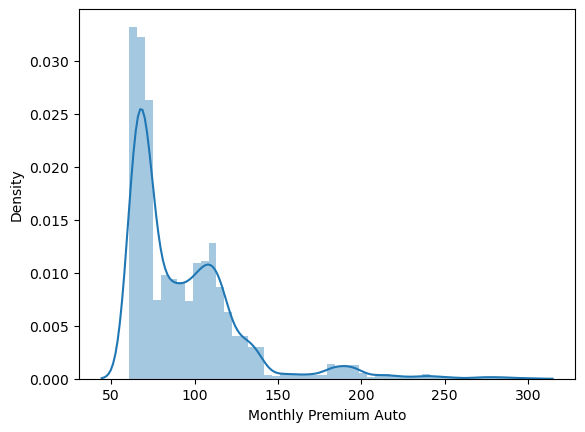

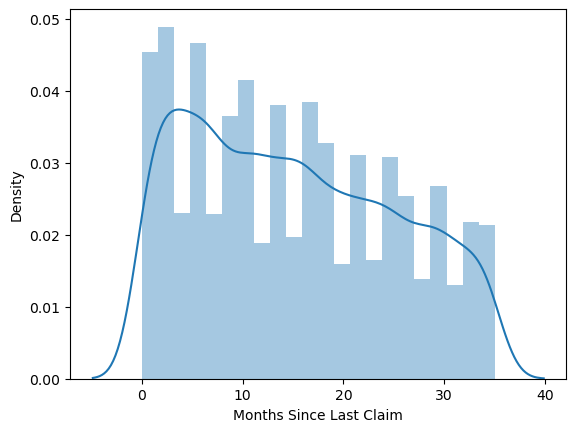

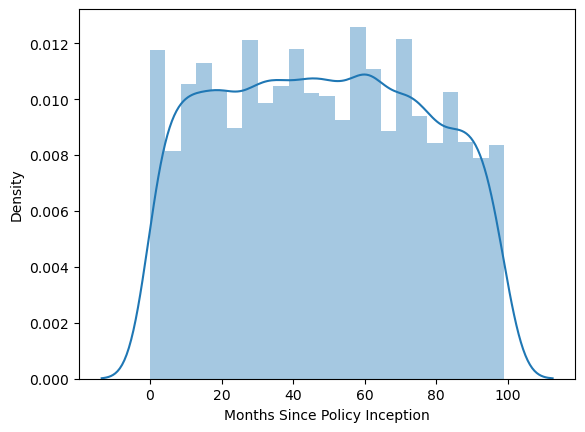

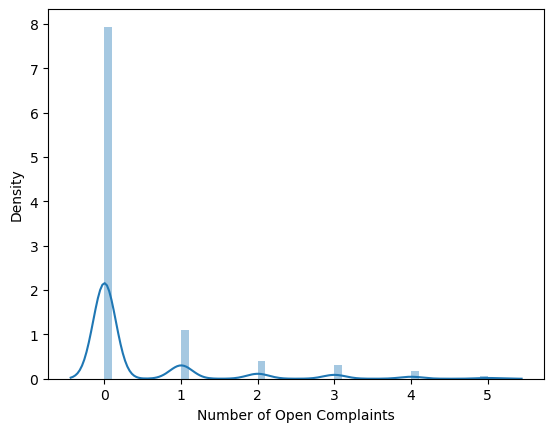

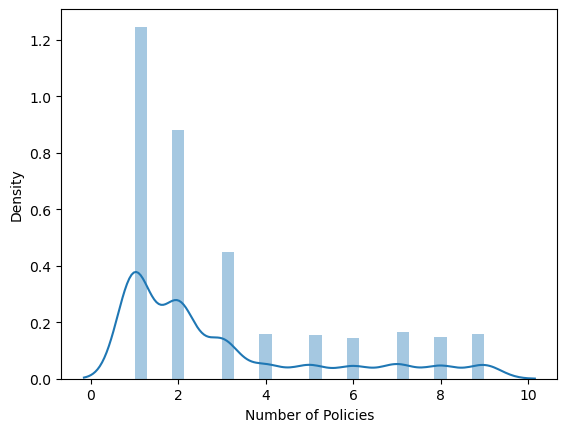

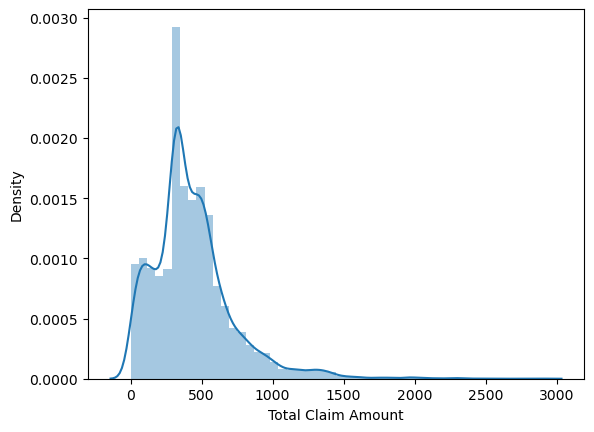

In [7]:
for column in numerical.columns:
    sns.distplot(data[column])
    plt.show()

*It should be noticed that discrete numerical columns cannot have a normal distribution! Then, in this case, Customer Lifetime Value, Income, and Total Claim Amount are continous variables and can be studies if they have a normal distribution. The rest can be behaved as categoricals. However, I have doubts about 'Monthly Premium Auto' as it has many values. I am not sure if it's a good idea to consider it as a numerical or categorical column.*

In [8]:
#Taking only the continous columns:
numerical_new = numerical[['Customer Lifetime Value', 'Income', 'Total Claim Amount']]

In [9]:
numerical_new

,Customer Lifetime Value,Income,Total Claim Amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


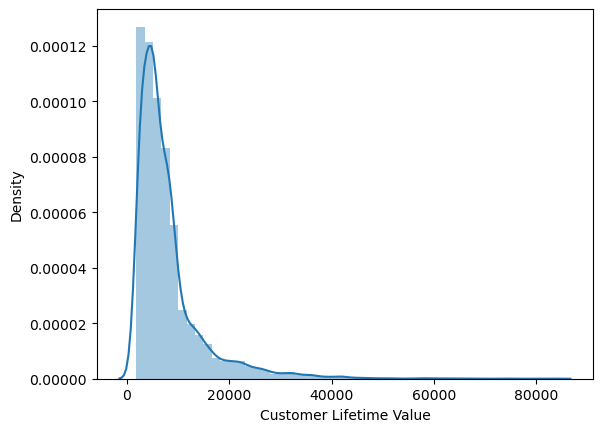

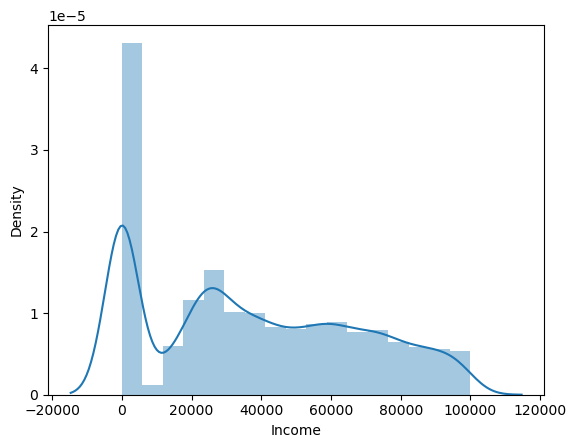

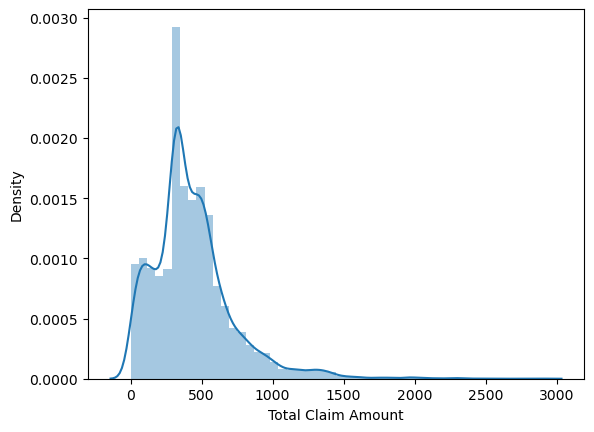

In [10]:
for column in numerical_new.columns:
    sns.distplot(data[column])
    plt.show()

*None of these distributions seem to be normal or exponential.*

**Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.**

In [11]:
CustomerLifetimeValue_1 = np.log(numerical_new['Customer Lifetime Value'])

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

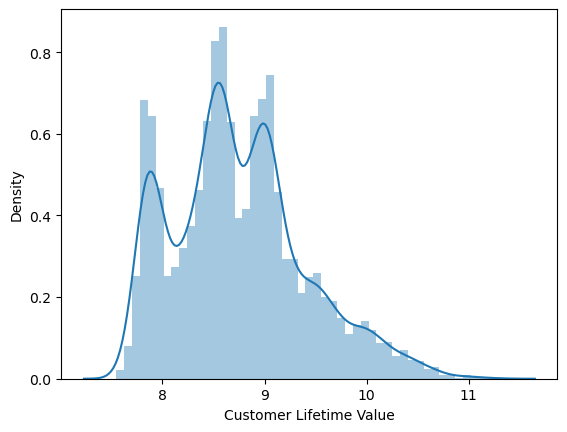

In [12]:
sns.distplot(CustomerLifetimeValue_1)

*log transformation made it worse. Another method has been used in the following.*

*Income doesn't look well with log transformation as -inf has appeared.*

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

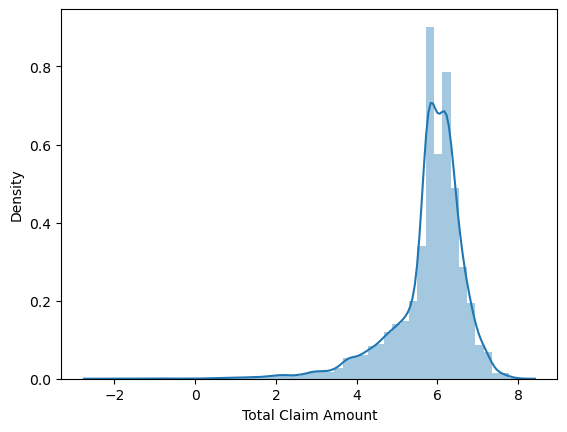

In [15]:
sns.distplot(TotalClaimAmount_1)

*Total Claim Amount has a distribution close to normal. Yet it is still skewed. However, it was improved.*

In [16]:
numerical_new1 = numerical_new.copy()

In [17]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical_new1)
x_standardized = transformer.transform(numerical_new1)
x_standardized

array([[-0.76287773,  0.61282744, -0.16963969],
       [-0.14924546, -1.23961684,  2.400737  ],
       [ 0.71063622,  0.36570978,  0.45573376],
       ...,
       [ 0.02313483, -1.23961684,  1.22793667],
       [-0.06993547, -0.51735647,  0.88511256],
       [-0.78495478, -1.23961684, -0.22200449]])

In [20]:
X_num_stand = pd.DataFrame(x_standardized, columns=numerical_new1.columns)
numerical_new1 = X_num_stand
numerical_new1

,Customer Lifetime Value,Income,Total Claim Amount
0,-0.762878,0.612827,-0.169640
1,-0.149245,-1.239617,2.400737
2,0.710636,0.365710,0.455734
3,-0.052263,-1.239617,0.329769
4,-0.755575,0.203390,-1.018843
...,...,...,...
9129,2.241590,1.128558,-0.811934
9130,-0.714411,-0.528450,-0.188956
9131,0.023135,-1.239617,1.227937
9132,-0.069935,-0.517356,0.885113


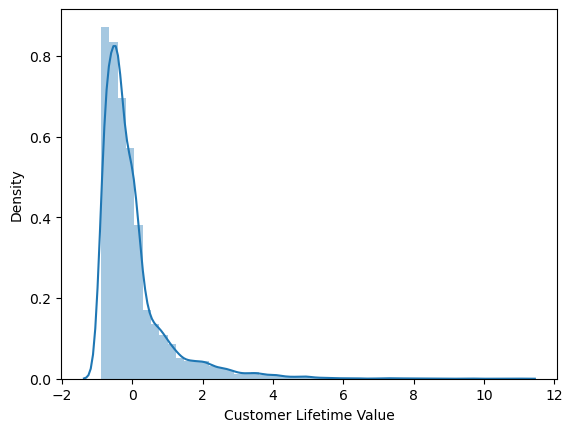

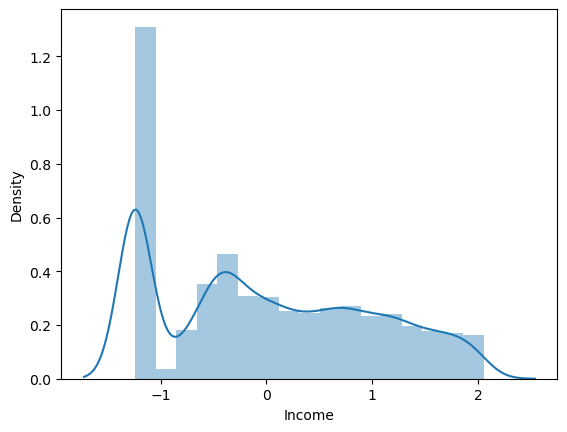

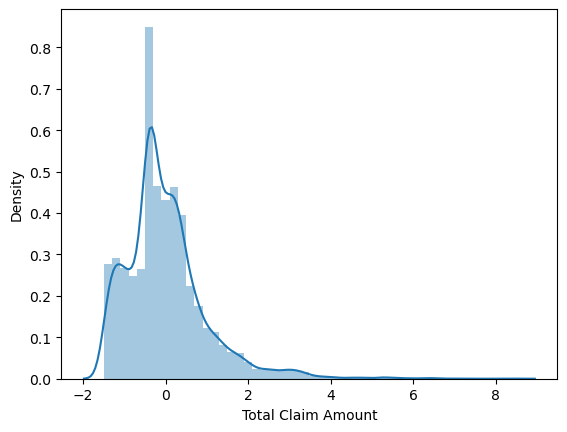

In [21]:
for column in numerical_new1.columns:
    sns.distplot(numerical_new1[column])
    plt.show()

*Also standard scaler didn't help. Using another method:*

In [22]:
numerical_new2 = numerical_new.copy()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(numerical_new2)

In [24]:
X_num_stand2 = pd.DataFrame(scaled, columns=numerical_new2.columns)
numerical_new2 = X_num_stand2
numerical_new2

,Customer Lifetime Value,Income,Total Claim Amount
0,0.010629,0.562847,0.132974
1,0.062406,0.000000,0.391051
2,0.134960,0.487763,0.195764
3,0.070589,0.000000,0.183117
4,0.011245,0.438443,0.047710
...,...,...,...
9129,0.264137,0.719547,0.068485
9130,0.014719,0.216081,0.131034
9131,0.076951,0.000000,0.273297
9132,0.069098,0.219452,0.238876


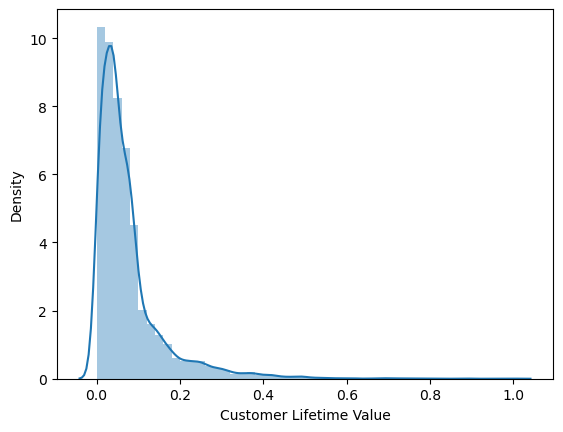

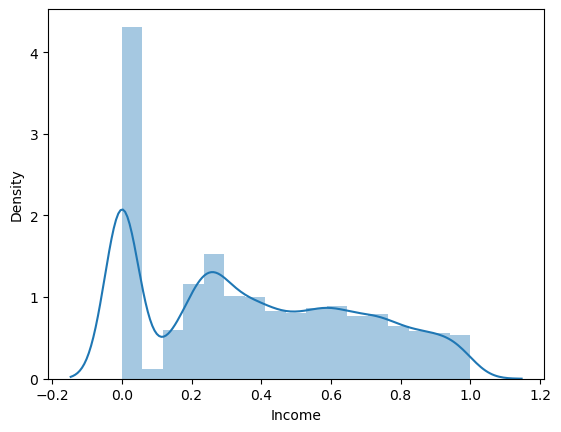

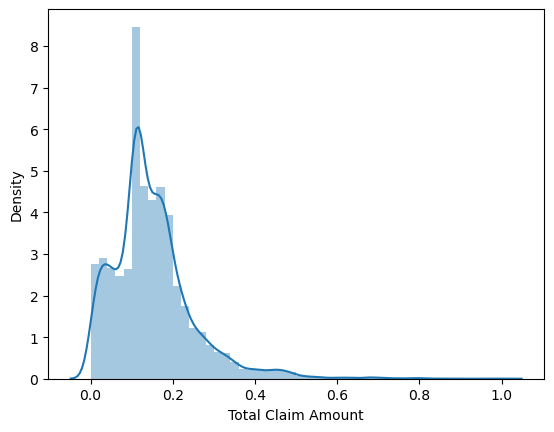

In [25]:
for column in numerical_new2.columns:
    sns.distplot(numerical_new2[column])
    plt.show()

*As the last 2 methods were just scaling methods, they didn't change the distribution and only changed the scale. So, in the next step box cox transformation will be used.*

In [26]:
numerical_new3 = numerical_new.copy()

In [27]:
import scipy.stats as stats
def boxcox_transform(x):
    numeric_cols = numerical_new3.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        numerical_new3[column] = np.where(numerical_new3[column]<=0, np.NAN, numerical_new3[column]) 
        numerical_new3[column] = numerical_new3[column].fillna(numerical_new3[column].mean())
        transformed_data, ci = stats.boxcox(numerical_new3[column])
        numerical_new3[column] = transformed_data
        _ci[column] = [ci] 
    return numerical_new3, _ci
numerical_new3, _ci = boxcox_transform(numerical_new3)
numerical_new3.head()

,Customer Lifetime Value,Income,Total Claim Amount
0,2.703839,1247.937066,33.035752
1,2.754926,1167.961720,56.357614
2,2.780772,1144.063081,40.071789
3,2.759125,1167.961720,38.763252
4,2.704995,1072.375744,19.560154


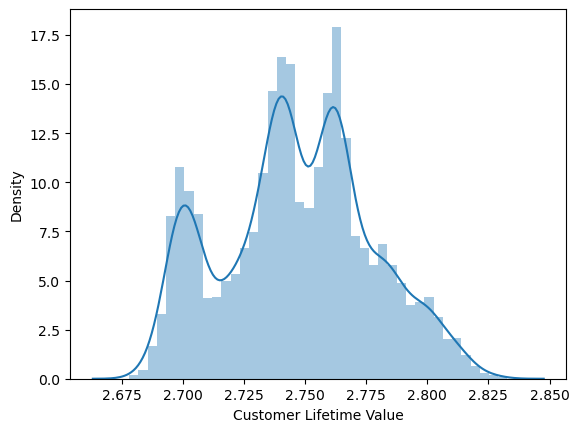

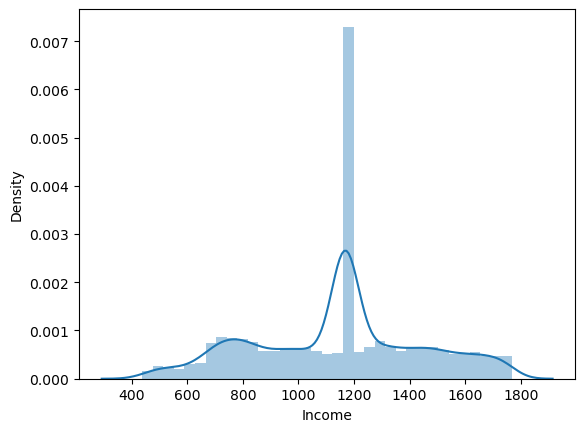

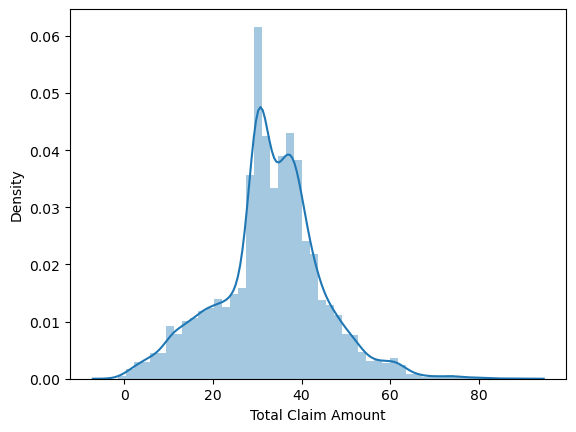

In [28]:
for column in numerical_new3.columns:
    sns.distplot(numerical_new3[column])
    plt.show()

*With box cox, income has a more normal distribution. But the rest no.*

**Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.**

In [29]:
numerical_new4 = numerical_new.copy()

In [34]:
#Using normalize function for data normalization
from sklearn import preprocessing
d = preprocessing.normalize(numerical_new4)
scaled_df = pd.DataFrame(d, columns=numerical_new4.columns)

In [35]:
scaled_df

,Customer Lifetime Value,Income,Total Claim Amount
0,0.049048,0.998773,0.006830
1,0.987113,0.000000,0.160023
2,0.255478,0.966750,0.011230
3,0.997607,0.000000,0.069137
4,0.064055,0.997941,0.003145
...,...,...,...
9129,0.309386,0.950933,0.002620
9130,0.141859,0.989734,0.017372
9131,0.995341,0.000000,0.096412
9132,0.324250,0.945502,0.029786


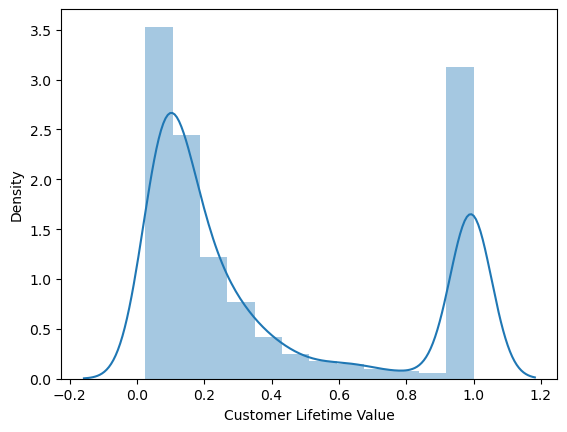

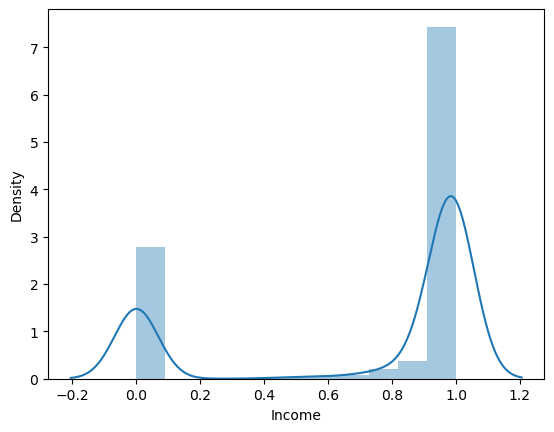

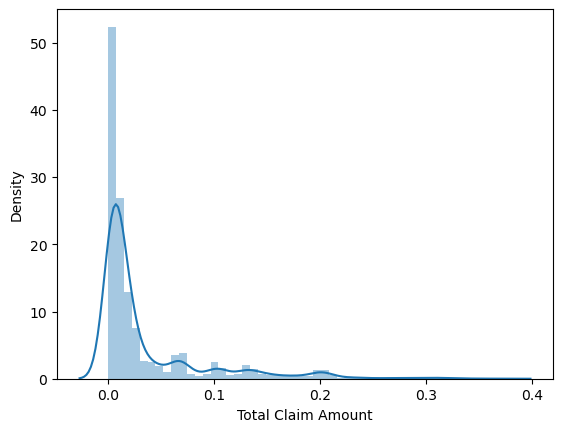

In [36]:
for column in scaled_df.columns:
    sns.distplot(scaled_df[column])
    plt.show()

*'Total claim amount' column looks better when compared to the others.*

In [41]:
numerical_new6 = numerical_new.copy()

In [42]:
for column in numerical_new6.columns:
    numerical_new6[column] = (numerical_new6[column] - numerical_new6[column].mean()) / numerical_new6[column].std()

numerical_new6

,Customer Lifetime Value,Income,Total Claim Amount
0,-0.762836,0.612794,-0.169630
1,-0.149237,-1.239549,2.400606
2,0.710597,0.365690,0.455709
3,-0.052260,-1.239549,0.329750
4,-0.755534,0.203379,-1.018788
...,...,...,...
9129,2.241467,1.128497,-0.811890
9130,-0.714372,-0.528421,-0.188946
9131,0.023134,-1.239549,1.227869
9132,-0.069932,-0.517328,0.885064


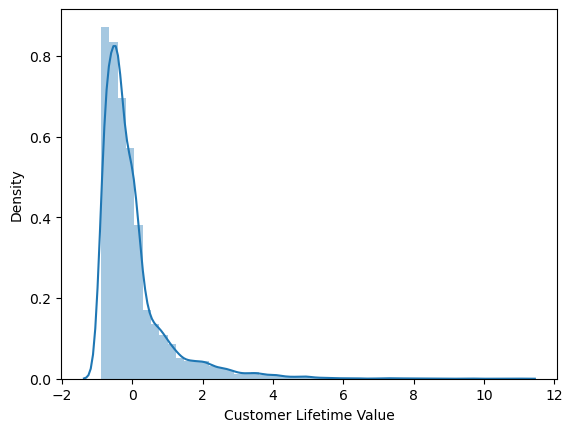

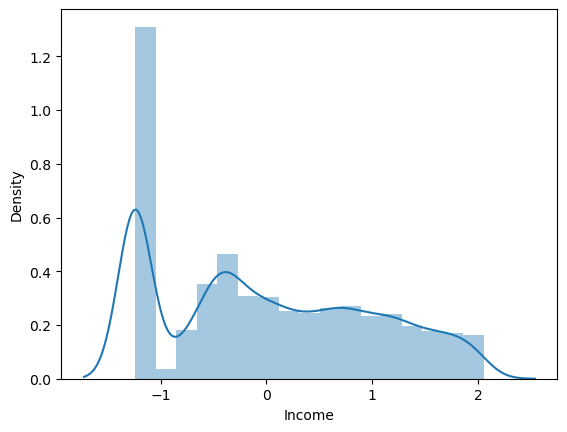

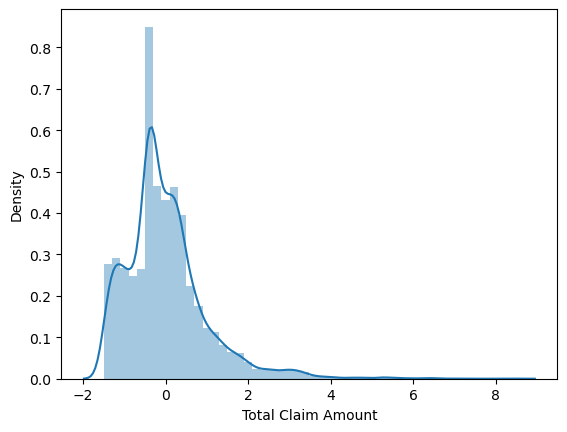

In [43]:
for column in numerical_new6.columns:
    sns.distplot(numerical_new6[column])
    plt.show()

*Normalization did not improve using this method.*

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

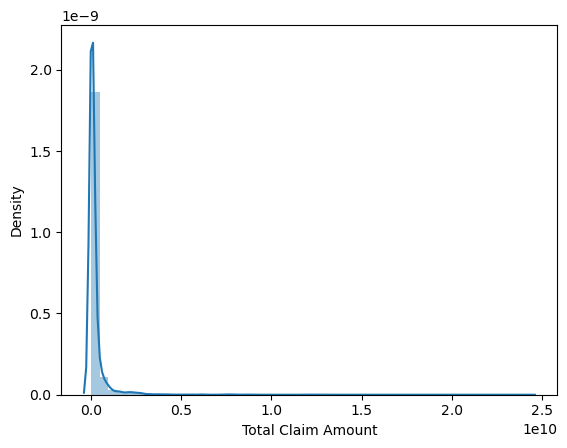

In [49]:
#Cube transform
transforms = numerical.copy()
transforms['Total Claim Amount'] = transforms['Total Claim Amount'].transform(lambda x: np.power(x, 3))
sns.distplot(transforms['Total Claim Amount'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

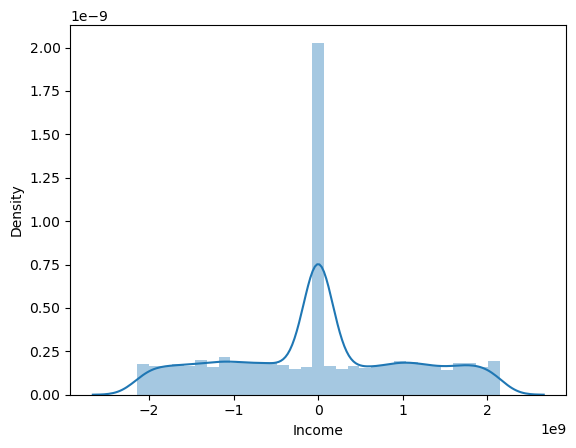

In [50]:
transforms['Income'] = transforms['Income'].transform(lambda x: np.power(x, 3))
sns.distplot(transforms['Income'])

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

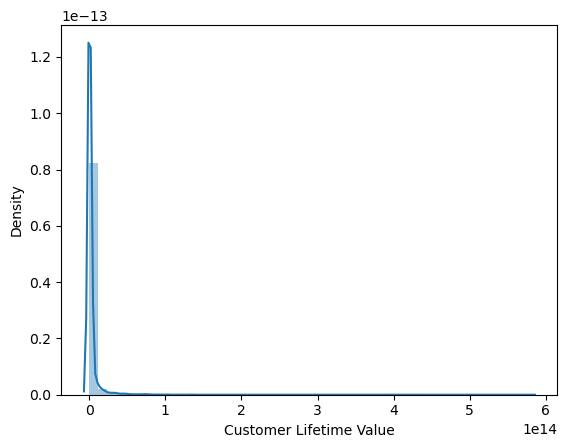

In [51]:
transforms['Customer Lifetime Value'] = transforms['Customer Lifetime Value'].transform(lambda x: np.power(x, 3))
sns.distplot(transforms['Customer Lifetime Value'])

*all the 3 plots look better and more normalized with cube transformations.*